In [1]:
import sys
sys.path.insert(0, "C:\\Users\\Yannick\\Documents\\PhD\\DL-EEG\\code")

import os
import utils as ut
import analysis as anl
import plt_config as cfg
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pandas as pd

In [2]:
df = ut.load_data_items()
results_df = ut.load_reported_results_data()
ut.check_data_items(df)

save_cfg = cfg.saving_config

In [3]:
df.head()

,Title,Year,Authors,Journal / Origin,Preprint first,Type of paper,Lab / School / Company,Country,Pages,Domain 1,...,Code available,Code hosted on,Limited data,Others & Comments,First Reader,Second Reader,Validated by Author(s),Citation,Main domain,ref_nb
0,EEG-signals based cognitive workload detection...,2018.0,"Almogbel, Dang & Kameyama",IEEE Conference on Advanced Communication Tech...,No,Conference,Waseda University,Japan,4.0,Classification of EEG signals,...,No,NaN,No,24 sessions of 15 to 30 minutes over 1 month o...,Yannick Roy,Isabela Albuquerque,TBC,Almogbel2018,Cognitive,[5]
1,Automatic ocular artifacts removal in EEG usin...,2018.0,"Yang, Duan, Fan, Hu & Wang",Biomedical Signal Processing and Control,No,Journal,Key Laboratory of Power Station Automation Tec...,China,11.0,Improvement of processing tools,...,No,NaN,No,Poorly written... :( The way some elements are...,Yannick Roy,Hubert Banville,TBC,Yang2018,Improvement of processing tools,[177]
2,An end-to-end framework for real-time automati...,2018.0,"Patanaik, Ong, Gooley, Ancoli-Israel & Chee",Sleep,No,Journal,"Duke-NUS Medical School, Singapore\nUniversity...",Singapore,11.0,Classification of EEG signals,...,No,NaN,No,"Great paper, with most of the information avai...",Yannick Roy,Hubert Banville,TBC,Patanaik2018,Sleep,[117]
3,Epileptic Seizure Detection: A Deep Learning A...,2018.0,"Hussein, Palangi, Ward & Wang",Arxiv,Yes,Preprint,UBC,Canada,12.0,Classification of EEG signals,...,No,NaN,No,"""To the best of our knowledge, this is the mos...",Yannick Roy,Hubert Banville,TBC,Hussein2018,Epilepsy,[67]
4,Development of a brain computer interface inte...,2018.0,"Perez-Benitez, Perez-Benitez & Espina-Hernandez","IEEE Conference on Electronics, Communications...",No,Conference,"National Polytechnic Institute, Mexico",Mexico,7.0,Classification of EEG signals,...,No,NaN,No,They say that it could go up to 220 commands!!...,Yannick Roy,Hubert Banville,TBC,Perez-Benitez2018,BCI,[120]


In [4]:
shapefile = os.path.expanduser('C:\\Users\\Yannick\\Documents\\PhD\\DL-EEG\\img\\countries\\ne_10m_admin_0_countries.shp')
#shapefile = './ne_10m_admin_0_countries_lakes.shp'

gdf = gpd.read_file(shapefile)[['ADMIN', 'geometry']].to_crs('+proj=robin')
gdf.head()

,ADMIN,geometry
0,Indonesia,(POLYGON ((11108970.26020776 445285.1302330397...
1,Malaysia,(POLYGON ((11108970.26020776 445285.1302330397...
2,Chile,(POLYGON ((-6477059.899247097 -1872360.8384665...
3,Bolivia,POLYGON ((-6477059.899247097 -1872360.83846657...
4,Peru,(POLYGON ((-6477059.899247097 -1872360.8384665...


In [5]:
dfx = df.Country.value_counts().reset_index().rename(columns={'index': 'Country', 'Country': 'Count'})
dfx.head()

print("Renaming Exceptions!")
print(dfx.loc[~dfx['Country'].isin(gdf['ADMIN'])])

# Exception #1 - USA: United States of America
dfx.loc[dfx['Country'] == 'USA', 'Country'] = 'United States of America'

# Exception #2 - UK: United Kingdom
dfx.loc[dfx['Country'] == 'UK', 'Country'] = 'United Kingdom'

# Exception #3 - Bosnia: Bosnia and Herzegovina
dfx.loc[dfx['Country'] == 'Bosnia', 'Country'] = 'Bosnia and Herzegovina'

if len(dfx.loc[~dfx['Country'].isin(gdf['ADMIN'])]) > 0:
    print("## ERROR ## - Unhandled Countries!")

Renaming Exceptions!
   Country  Count
0      USA     37
7       UK      5
28  Bosnia      1


In [6]:
for c in gdf['ADMIN']:
    print(c)
    if any(dfx['Country'].str.contains(c)):
        gdf.loc[gdf['ADMIN'] == c, 'Count'] = dfx[dfx['Country'].str.contains(c)]['Count'].values[0]
    else:
        gdf.loc[gdf['ADMIN'] == c, 'Count'] = 0

Indonesia
Malaysia
Chile
Bolivia
Peru
Argentina
Dhekelia Sovereign Base Area
Cyprus
India
China
Israel
Palestine
Lebanon
Ethiopia
South Sudan
Somalia
Kenya
Pakistan
Malawi
United Republic of Tanzania
Syria
Somaliland
France
Suriname
Guyana
South Korea
North Korea
Morocco
Western Sahara
Costa Rica
Nicaragua
Republic of the Congo
Democratic Republic of the Congo
Bhutan
Ukraine
Belarus
Namibia
South Africa
Saint Martin
Sint Maarten
Oman
Uzbekistan
Kazakhstan
Tajikistan
Lithuania
Brazil
Uruguay
Mongolia
Russia
Czechia
Germany
Estonia
Latvia
Norway
Sweden
Finland
Vietnam
Cambodia
Luxembourg
United Arab Emirates
Belgium
Georgia
Macedonia
Albania
Azerbaijan
Kosovo
Turkey
Spain
Laos
Kyrgyzstan
Armenia
Denmark
Libya
Tunisia
Romania
Hungary
Slovakia
Poland
Ireland
United Kingdom
Greece
Zambia
Sierra Leone
Guinea
Liberia
Central African Republic
Sudan
Djibouti
Eritrea
Austria
Iraq
Italy
Switzerland
Iran
Netherlands
Liechtenstein
Ivory Coast
Republic of Serbia
Mali
Senegal
Nigeria
Benin
Angola
Cro

C:\Users\Yannick\Miniconda3\envs\dleeg37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
dfx.head()

,Country,Count
0,United States of America,37
1,China,25
2,Australia,13
3,Canada,11
4,Germany,8


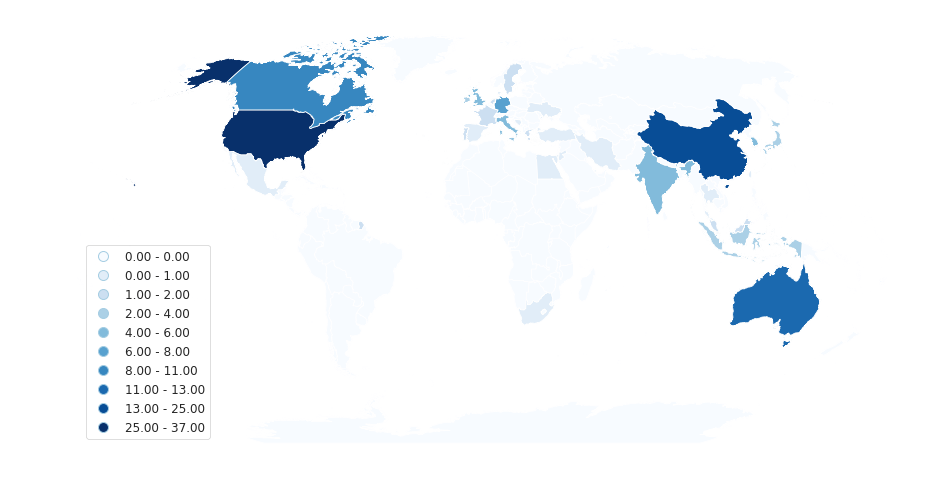

In [12]:
figsize = (16, 10)

ax = gdf.plot(column='Count', figsize=figsize, cmap='Blues', scheme='Fisher_Jenks', k=10, legend=True, ax=None, legend_kwds={'fontsize':'large'})
ax.get_legend().set_bbox_to_anchor((0.,0.,0.2,0.5))
ax.set_axis_off()

C:\Users\Yannick\Miniconda3\envs\dleeg37\lib\site-packages\geopandas\plotting.py:389: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  "(for consistency with pandas)", FutureWarning)


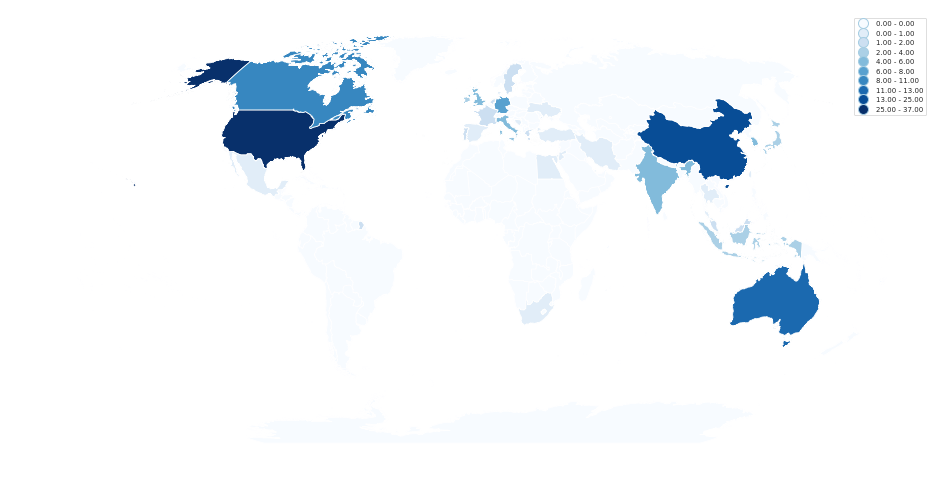

In [9]:
figsize = (16, 10)
ax = gdf.plot(column='Count', figsize=figsize, cmap='Blues', scheme='Fisher_Jenks', k=10, legend=True, axes=None)
ax.set_axis_off()
fig = ax.get_figure()

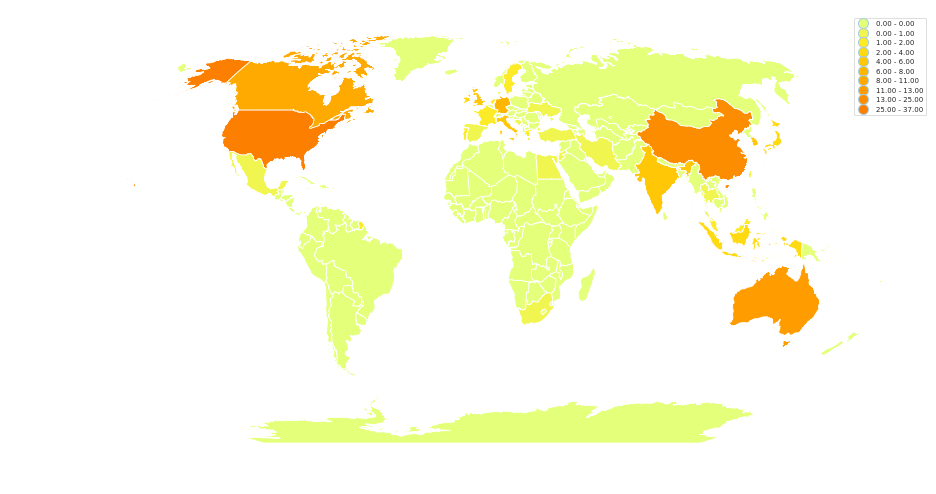

In [13]:
figsize = (16, 10)
ax = gdf.plot(column='Count', figsize=figsize, cmap='Wistia', scheme='Fisher_Jenks', k=10, legend=True, axes=None)
ax.set_axis_off()

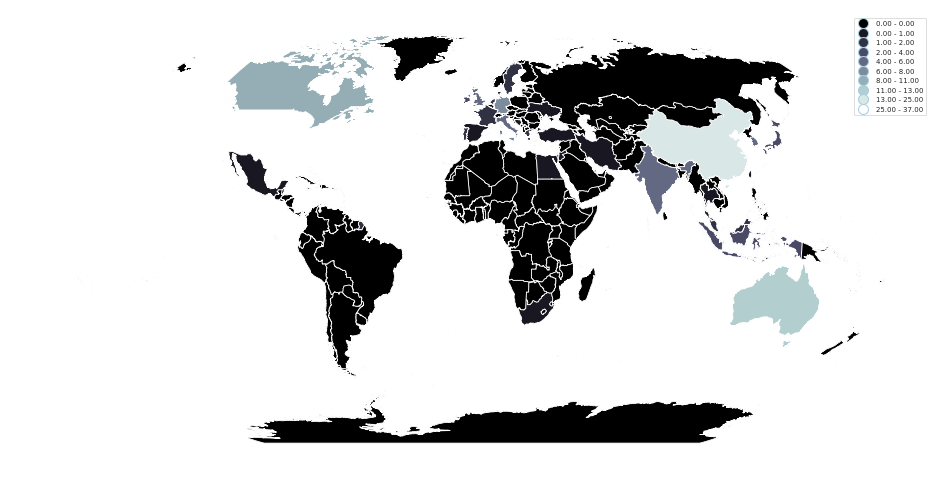

In [11]:
figsize = (16, 10)
ax = gdf.plot(column='Count', figsize=figsize, cmap='bone', scheme='Fisher_Jenks', k=10, legend=True, axes=None)
ax.set_axis_off()

Text(0, -10000000.0, '−1.00')
Text(0, -7500000.0, '−0.75')
Text(0, -5000000.0, '−0.50')
Text(0, -2500000.0, '−0.25')
Text(0, 0.0, '0.00')
Text(0, 2500000.0, '0.25')
Text(0, 5000000.0, '0.50')
Text(0, 7500000.0, '0.75')
Text(0, 10000000.0, '1.00')
Text(0, -10000000.0, '−1.00')
Text(0, -7500000.0, '−0.75')
Text(0, -5000000.0, '−0.50')
Text(0, -2500000.0, '−0.25')
Text(0, 0.0, '0.00')
Text(0, 2500000.0, '0.25')
Text(0, 5000000.0, '0.50')
Text(0, 7500000.0, '0.75')
Text(0, 10000000.0, '1.00')


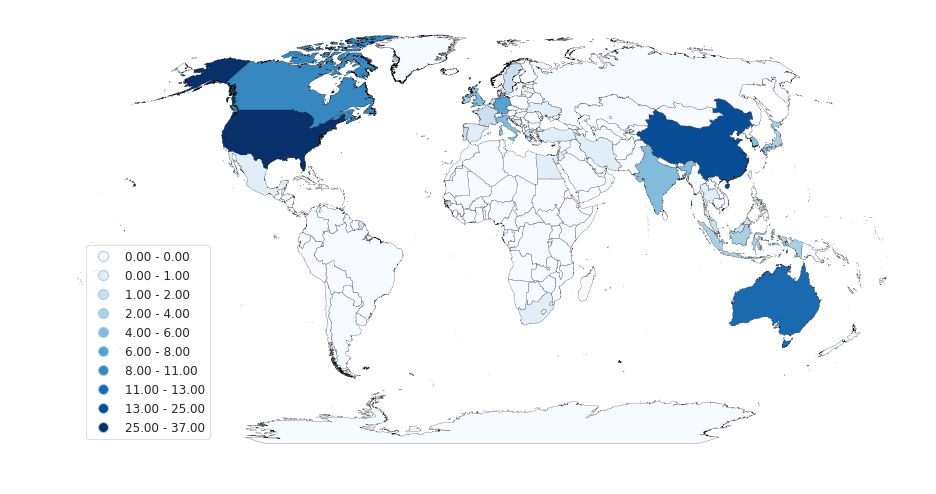

In [30]:
figsize = (16, 10)

ax = gdf.plot(column='Count', figsize=figsize, cmap='Blues', scheme='Fisher_Jenks', k=10, legend=True, ax=None, linewidth=0.2, edgecolor='black', legend_kwds={'fontsize':'large'})
ax.get_legend().set_bbox_to_anchor((0.,0.,0.2,0.5))
ax.set_axis_off()


ticks = ax.get_yticklabels()
for tick in ticks:
    print(tick)
    
fig = ax.get_figure()
fig.axes[0].get_yticklabels()
ticks = fig.axes[0].get_yticklabels()
for tick in ticks:
    print(tick)
    
axs = ax.get_figure().get_axes()
axs[0]